In [1]:
import os
from os import listdir
from os.path import isfile, join

mypath = "C:/Users/Basma/Downloads/GraduationProject/hearMeOut1/DataCleaned/Me"

In [2]:
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
print(onlyfiles[0])
print('data amount: ', len(onlyfiles))

ASL2811_212607.xlsx
data amount:  1044


In [3]:
import pandas as pd
import numpy as np

result = []
inputs = np.empty((0,57))

for exl in onlyfiles:
    
    #Collecting each file's data
    file = join(mypath, exl)
    read = pd.read_excel(file, header = None).to_numpy()
    read = np.delete(read, 0, 0) #array, idx, axis
    read = read.reshape(1,57)
    inputs = np.append(inputs, read, axis=0)
        
    # Extracting the class from the file name
    s = exl.split("_")
    no_digits = []
    
    # Iterate through the string, adding non-numbers to the no_digits list
    for i in s[0]:
        if not i.isdigit():
            no_digits.append(i)

    # Joining characters 
    result.append(''.join(no_digits))

results = np.array(result)
results = results.reshape(-1, 1)


In [70]:
# Putting the data in dataframe and shuffeling it
# print(inputs.shape)
# print(results.shape)
data = np.concatenate((inputs, results), axis = 1)
# print(data.shape)
df = pd.DataFrame(data)
df = df.sample(frac=1)

X = df.iloc[:,0:57].to_numpy()
X = np.asarray(X).astype(np.float32)
Y = df.iloc[:,-1].to_numpy()

In [1]:
# print(Y.values)
print(Y.shape)
print(type(Y))
print(Y)
# print(X.values)
print(X.shape)
print(type(X))
print(X)



NameError: name 'Y' is not defined

In [72]:
#to encode strings into integers
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)

#to convert integers to dummy variables
# from tensorflow.keras import utils #utils.np_utils
# dummy_Y = utils.to_categorical(encoded_Y)
#bt3ml I matrix lel classes

In [121]:
print(set(Y))
print(set(encoded_Y))
decoded = encoder.inverse_transform(encoded_Y)
print(set(decoded))

{'yes', 'nothing', 'CULater', 'canIHelpU', 'welcome', 'want', 'please', 'signLanguage', 'hru', 'no', 'ASL', 'deaf', 'nicemeetu', 'ok', 'notAlot', 'learn', 'sorry', 'good', 'busy', 'hello', 'whatsup', 'have', 'hardHearing'}
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22}
{'yes', 'nothing', 'CULater', 'canIHelpU', 'welcome', 'want', 'please', 'signLanguage', 'hru', 'no', 'ASL', 'deaf', 'nicemeetu', 'ok', 'notAlot', 'learn', 'sorry', 'good', 'busy', 'hello', 'whatsup', 'have', 'hardHearing'}


In [74]:
print(type(encoded_Y))
print(encoded_Y.shape)
print(encoded_Y)

<class 'numpy.ndarray'>
(1044,)
[ 2 18  9 ... 22  1  6]


In [75]:
#Splitting data for training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, encoded_Y, test_size=0.2, random_state=42)

In [76]:
print(X_train.shape)
print(Y_train.shape)

(835, 57)
(835,)


In [125]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_train, Y_train)

from sklearn.metrics import classification_report
Y_predict = neigh.predict(X_test)
print(classification_report(Y_test, Y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.91      1.00      0.95        10
           2       1.00      1.00      1.00         9
           3       1.00      1.00      1.00         7
           4       1.00      1.00      1.00        15
           5       1.00      1.00      1.00        13
           6       1.00      1.00      1.00        13
           7       0.89      1.00      0.94         8
           8       1.00      1.00      1.00         7
           9       1.00      1.00      1.00         8
          10       1.00      0.93      0.97        15
          11       1.00      1.00      1.00         9
          12       1.00      1.00      1.00         5
          13       1.00      1.00      1.00        13
          14       0.92      1.00      0.96        11
          15       1.00      1.00      1.00         2
          16       1.00      1.00      1.00         7
          17       1.00    

C:\Users\Basma\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


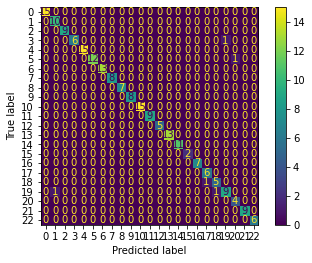

In [112]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(neigh, X_test, Y_test)
plt.show()

In [78]:
# neigh.score(Y_test, Y_predict)

In [79]:
neigh2 = KNeighborsClassifier(n_neighbors=3)
neigh2.fit(X_train, Y_train)

Y2_predict = neigh2.predict(X_test)
print(classification_report(Y_test, Y2_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.91      1.00      0.95        10
           2       1.00      1.00      1.00         9
           3       1.00      0.86      0.92         7
           4       1.00      1.00      1.00        15
           5       1.00      1.00      1.00        13
           6       1.00      1.00      1.00        13
           7       1.00      1.00      1.00         8
           8       1.00      1.00      1.00         7
           9       1.00      1.00      1.00         8
          10       1.00      1.00      1.00        15
          11       1.00      1.00      1.00         9
          12       1.00      1.00      1.00         5
          13       0.93      1.00      0.96        13
          14       0.92      1.00      0.96        11
          15       1.00      1.00      1.00         2
          16       1.00      1.00      1.00         7
          17       1.00    

C:\Users\Basma\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


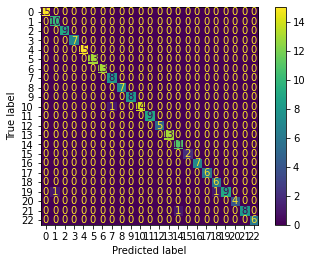

In [103]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(neigh2, X_test, Y_test)

In [92]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(warm_start = True,
                         solver = 'sag',
                         random_state = 42,
                         multi_class = 'multinomial',
                         max_iter=1000)
lr = lr.fit(X_train, Y_train)
# lr.score(X_train, Y_train)

C:\Users\Basma\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [93]:
Ylr_predict = lr.predict(X_test)
print(classification_report(Y_test, Ylr_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00         9
           3       1.00      1.00      1.00         7
           4       1.00      0.93      0.97        15
           5       1.00      0.92      0.96        13
           6       1.00      1.00      1.00        13
           7       1.00      1.00      1.00         8
           8       1.00      1.00      1.00         7
           9       1.00      1.00      1.00         8
          10       0.86      0.80      0.83        15
          11       1.00      1.00      1.00         9
          12       0.43      0.60      0.50         5
          13       1.00      1.00      1.00        13
          14       0.71      0.91      0.80        11
          15       1.00      1.00      1.00         2
          16       1.00      0.86      0.92         7
          17       0.86    

C:\Users\Basma\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


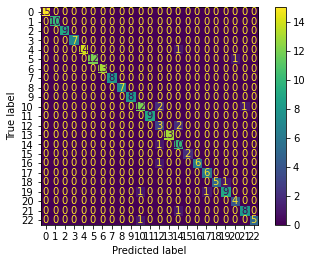

In [104]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(lr, X_test, Y_test)

In [94]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

rf = RandomForestClassifier(n_estimators=100,
                            max_depth=10, random_state=0)
rf.fit(X_train, Y_train)

RandomForestClassifier(max_depth=10, random_state=0)

In [95]:
from sklearn.metrics import classification_report
Yrf_predict = rf.predict(X_test)
print(classification_report(Y_test, Yrf_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00         9
           3       1.00      1.00      1.00         7
           4       1.00      1.00      1.00        15
           5       1.00      0.92      0.96        13
           6       1.00      1.00      1.00        13
           7       1.00      1.00      1.00         8
           8       1.00      1.00      1.00         7
           9       1.00      1.00      1.00         8
          10       1.00      1.00      1.00        15
          11       1.00      1.00      1.00         9
          12       1.00      1.00      1.00         5
          13       1.00      1.00      1.00        13
          14       1.00      1.00      1.00        11
          15       1.00      1.00      1.00         2
          16       0.88      1.00      0.93         7
          17       1.00    

C:\Users\Basma\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


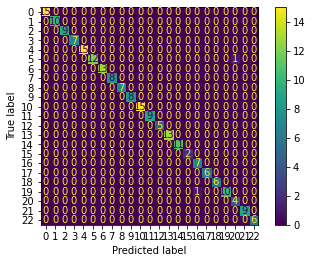

In [105]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(rf, X_test, Y_test)

In [106]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=0) 
dt.fit(X_train, Y_train)
cross_val_score(dt, X_train, Y_train, cv=10)

Ydt_predict = dt.predict(X_test)
print(classification_report(Y_test, Ydt_predict))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87        15
           1       1.00      1.00      1.00        10
           2       0.83      0.56      0.67         9
           3       0.88      1.00      0.93         7
           4       0.87      0.87      0.87        15
           5       0.92      0.92      0.92        13
           6       0.75      0.92      0.83        13
           7       1.00      1.00      1.00         8
           8       0.83      0.71      0.77         7
           9       1.00      1.00      1.00         8
          10       1.00      1.00      1.00        15
          11       1.00      1.00      1.00         9
          12       0.67      0.80      0.73         5
          13       1.00      1.00      1.00        13
          14       0.85      1.00      0.92        11
          15       0.67      1.00      0.80         2
          16       1.00      0.86      0.92         7
          17       0.83    

C:\Users\Basma\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


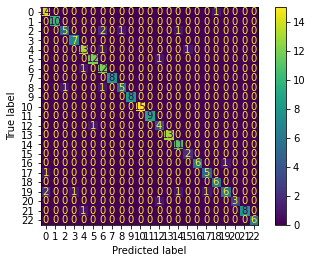

In [109]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(dt, X_test, Y_test)

In [97]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

svm = make_pipeline(StandardScaler(), SVC(gamma='auto'))
svm.fit(X_train, Y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

In [98]:
Ysvm_predict = svm.predict(X_test)
print(classification_report(Y_test, Ysvm_predict))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00         9
           3       1.00      0.86      0.92         7
           4       1.00      1.00      1.00        15
           5       1.00      1.00      1.00        13
           6       1.00      1.00      1.00        13
           7       1.00      1.00      1.00         8
           8       1.00      1.00      1.00         7
           9       1.00      1.00      1.00         8
          10       0.94      1.00      0.97        15
          11       1.00      1.00      1.00         9
          12       1.00      1.00      1.00         5
          13       1.00      1.00      1.00        13
          14       0.92      1.00      0.96        11
          15       1.00      1.00      1.00         2
          16       1.00      1.00      1.00         7
          17       0.86    

C:\Users\Basma\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


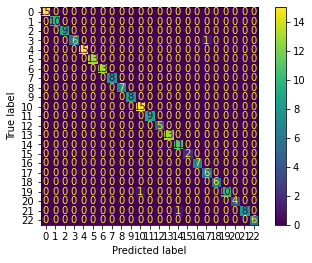

In [110]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(svm, X_test, Y_test)

In [67]:
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(n_estimators=1000, 
                                 learning_rate=0.3,
                                 max_depth=8, 
                                 random_state=0)
gb.fit(X_train, Y_train)
Ygb_predict = gb.predict(X_test)
print(classification_report(Y_test, Ygb_predict))


              precision    recall  f1-score   support

           0       0.88      0.88      0.88         8
           1       0.89      1.00      0.94         8
           2       1.00      1.00      1.00         5
           3       1.00      0.90      0.95        10
           4       1.00      0.88      0.93         8
           5       0.88      1.00      0.93         7
           6       1.00      1.00      1.00        10
           7       0.80      0.80      0.80         5
           8       1.00      0.89      0.94         9
           9       1.00      0.88      0.93         8
          10       0.80      0.80      0.80        10
          11       0.94      1.00      0.97        16
          12       0.62      0.89      0.73         9
          13       1.00      0.88      0.93        16
          14       0.83      0.50      0.62        10
          15       1.00      1.00      1.00        11
          16       1.00      1.00      1.00         7
          17       1.00    

In [99]:
#Saving all the models
# import pickle
# knn1file = 'knn1.sav'
# knn3file = 'knn3.sav'
# lrFile = 'lr.sav'
# svmFile = 'svm.sav'
# rfFile = 'rf.sav'
# dtFile = 'dt.sav'

# pickle.dump(neigh, open(knn1file, 'wb'))
# pickle.dump(neigh2, open(knn3file, 'wb'))
# pickle.dump(lr, open(lrFile, 'wb'))
# pickle.dump(svm, open(svmFile, 'wb'))
# pickle.dump(rf, open(rfFile, 'wb'))
# pickle.dump(dt, open(dtFile, 'wb'))



In [247]:
# print(encoder.inverse_transform(Y_test).shape)
# print(encoder.inverse_transform(Ysvm_predict).shape)
# y1 = encoder.inverse_transform(Y_test)
# y2 = encoder.inverse_transform(Ysvm_predict)
# print(classification_report(y1, y2))


              precision    recall  f1-score   support

         ASL       1.00      0.93      0.96        14
     CULater       0.89      1.00      0.94         8
        busy       1.00      1.00      1.00         8
   canIHelpU       1.00      1.00      1.00         9
        deaf       0.82      1.00      0.90         9
        good       1.00      1.00      1.00         6
 hardHearing       1.00      1.00      1.00         9
        have       1.00      1.00      1.00         5
       hello       1.00      1.00      1.00        12
         hru       1.00      0.89      0.94         9
       learn       0.89      1.00      0.94         8
   nicemeetu       1.00      1.00      1.00         6
          no       1.00      1.00      1.00         9
     notAlot       1.00      1.00      1.00        13
     nothing       1.00      0.80      0.89         5
          ok       1.00      1.00      1.00         8
      please       1.00      1.00      1.00         5
signLanguage       1.00    

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer
import tensorflow.keras.backend as K

# model = Sequential()
# model.add(InputLayer(57))
# model.add(Dense(120, activation = "relu"))
# model.add(Dense(23, activation = "sigmoid"))
# model.summary()

# model = Sequential()
# model.add(Dense(8, input_dim=57, activation='relu'))
# model.add(Dense(23, activation='softmax'))

# model.compile(loss='categorical_crossentropy',
#               optimizer='adam', 
#               metrics=['accuracy'])
# model.summary()

model = Sequential()
model.add(InputLayer(57))
model.add(Dense(128, activation='relu',kernel_regularizer=regularizers.l2()))
# model.add(tf.keras.layers.Dropout(0.1))
# model.add(Dense(64, activation='relu'))
#model.add(tf.keras.layers.Dropout(0.2))
model.add(Dense(23, activation='softmax'))

model.summary()

In [ ]:
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.05,
                              patience=80, min_lr=0.0001)

early_stopping = EarlyStopping(monitor='loss', patience=160)

model.compile(loss='sparse_categorical_crossentropy',
              optimizer=Adam(0.001), 
              metrics=['accuracy'])

In [ ]:
# model.fit(X_train, Y_train, verbose=0, epochs= 200)
# model.fit(X_train, Y_train, 
#           verbose=1, 
#           epochs=200, 
#           batch_size=35,
#          callbacks=[reduce_lr,early_stopping])
model.fit(X_train, Y_train,validation_data=(X_test,Y_test) , 
          epochs= 500,batch_size=64,
          callbacks=[reduce_lr,early_stopping]
         )
# from sklearn.metrics import confusion_matrix
# Y_pred_class = model.predict_classes(X_test)
# Y_predicted = model.predict(X_test)
# Y_test_class = np.argmax(Y_test, axis=1)
# confusion_matrix(Y_test_class, Y_pred_class)

Y_predicted = model.predict(X_test)
Y_predicted_class = np.argmax(Y_predicted,axis=1)
# Y_test_class = np.argmax(Y_test, axis=1)
# confusion_matrix(Y_test, Y_predicted_class)
print(classification_report(Y_test, Y_predicted_class))